In [1]:
import pandas as pd
import sys
import os

# Add the path where load_data.py is located to the system path
sys.path.append(os.path.abspath(r'C:\Users\MMM\Documents\10 Academy File\KAIM-Week-2\script'))

# Import the function from load_data.py
from load_data import load_data_from_postgres

# Assuming load_data_from_postgres connects to the PostgreSQL database and returns a DataFrame
data = load_data_from_postgres()

# Display the first few rows of the data
print(data.head())


In [1]:
import sys
import os

# Add path to load_data.py
sys.path.append(os.path.abspath(r'C:\Users\MMM\Documents\10 Academy File\KAIM-Week-2\script'))

# Import the function
from load_data import load_data_from_postgres

# Define your SQL query
query = "SELECT * FROM public.xdr_data;"  # Replace with your actual table name if different

# Load data from PostgreSQL
data_cleaned = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if data_cleaned is not None:
    print("Successfully loaded the data")
    print(data_cleaned.head())
else:
    print("Failed to load data.")


Database connection established


C:\Users\MMM\Documents\10 Academy File\KAIM-Week-2\script\load_data.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Database connection closed
Successfully loaded the data
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1               

In [2]:
import numpy as np

# Fill 'HTTP UL' and 'HTTP DL' with 0 (assuming missing values indicate no data transfer)
data_cleaned['HTTP UL (Bytes)'].fillna(0, inplace=True)
data_cleaned['HTTP DL (Bytes)'].fillna(0, inplace=True)

# Fill 'TCP DL Retrans. Vol (Bytes)' using linear interpolation (useful if time-dependent)
data_cleaned['TCP DL Retrans. Vol (Bytes)'].interpolate(method='linear', inplace=True)

# Fill 'Avg RTT DL (ms)' with the median or use group-based imputation
data_cleaned['Avg RTT DL (ms)'].fillna(data_cleaned['Avg RTT DL (ms)'].median(), inplace=True)
# Fill IMSI and MSISDN/Number with placeholder values
data_cleaned['IMSI'].fillna('Unknown_IMSI', inplace=True)
data_cleaned['MSISDN/Number'].fillna('Unknown_MSISDN', inplace=True)
# Check the remaining columns
data_cleaned['Handset Type'].dropna()
data_cleaned['Handset Manufacturer'].dropna()


# Replace missing values with mean for numerical columns
data_cleaned['TCP DL Retrans. Vol (Bytes)'].fillna(data_cleaned['TCP DL Retrans. Vol (Bytes)'].mean(), inplace=True)
data_cleaned['TCP UL Retrans. Vol (Bytes)'].fillna(data_cleaned['TCP UL Retrans. Vol (Bytes)'].mean(), inplace=True)
data_cleaned['Avg RTT DL (ms)'].fillna(data_cleaned['Avg RTT DL (ms)'].mean(), inplace=True)
data_cleaned['Avg RTT UL (ms)'].fillna(data_cleaned['Avg RTT UL (ms)'].mean(), inplace=True)
data_cleaned['Avg Bearer TP DL (kbps)'].fillna(data_cleaned['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
data_cleaned['Avg Bearer TP UL (kbps)'].fillna(data_cleaned['Avg Bearer TP UL (kbps)'].mean(), inplace=True)

C:\Users\MMM\AppData\Local\Temp\ipykernel_18140\827654994.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['HTTP UL (Bytes)'].fillna(0, inplace=True)
C:\Users\MMM\AppData\Local\Temp\ipykernel_18140\827654994.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [7]:
# Aggregate per customer
customer_experience = data_cleaned.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'Handset Type': 'first'  # Assuming 'Handset Type' is consistent per customer
}).reset_index()

# Calculate Average throughput (DL + UL throughput)
customer_experience['Average Throughput (kbps)'] = (
    customer_experience['Avg Bearer TP DL (kbps)'] + customer_experience['Avg Bearer TP UL (kbps)']) / 2

# Display the aggregated data
print(customer_experience.head())


   MSISDN/Number  TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0  33601001722.0                 1.780362e+06                759658.664811   
1  33601001754.0                 2.651644e+06                759658.664811   
2  33601002511.0                 3.931369e+06                759658.664811   
3  33601007832.0                 1.066000e+03                759658.664811   
4  33601008617.0                 5.072888e+06                390430.332406   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0             46.0         0.000000                     37.0   
1             30.0         1.000000                     48.0   
2             45.0        17.662883                     48.0   
3             69.0        15.000000                    204.0   
4             57.0         2.500000                  20197.5   

   Avg Bearer TP UL (kbps)                    Handset Type  \
0                     39.0  Huawei P20 Lite Huawei Nova 3E   
1                     

In [4]:
customer_experience.shape

(106857, 9)

In [9]:
# Function to compute top, bottom, and most frequent values for a given column
def compute_stats(column):
    # Compute the top 10 largest values
    top_values = data_cleaned[column].nlargest(10)
    
    # Compute the bottom 10 smallest values
    bottom_values = data_cleaned[column].nsmallest(10)
    
    # Compute the 10 most frequent values
    most_frequent_values = data_cleaned[column].mode().head(10)  # Using mode() to find the most frequent

    return top_values, bottom_values, most_frequent_values

# Compute stats for 'TCP DL Retrans. Vol (Bytes)'
tcp_top, tcp_bottom, tcp_frequent = compute_stats('TCP DL Retrans. Vol (Bytes)')

# Compute stats for 'Avg RTT DL (ms)'
rtt_top, rtt_bottom, rtt_frequent = compute_stats('Avg RTT DL (ms)')

# Compute stats for 'Avg Bearer TP DL (kbps)'
throughput_top, throughput_bottom, throughput_frequent = compute_stats('Avg Bearer TP DL (kbps)')

# Display results for TCP DL Retransmission Volume (Bytes)
print("Top TCP DL Retrans. Vol (Bytes):\n", tcp_top)
print("\nBottom TCP DL Retrans. Vol (Bytes):\n", tcp_bottom)
print("\nMost Frequent TCP DL Retrans. Vol (Bytes):\n", tcp_frequent)

# Display results for RTT
print("\nTop Avg RTT DL (ms):\n", rtt_top)
print("\nBottom Avg RTT DL (ms):\n", rtt_bottom)
print("\nMost Frequent Avg RTT DL (ms):\n", rtt_frequent)

# Display results for Throughput
print("\nTop Avg Bearer TP DL (kbps):\n", throughput_top)
print("\nBottom Avg Bearer TP DL (kbps):\n", throughput_bottom)
print("\nMost Frequent Avg Bearer TP DL (kbps):\n", throughput_frequent)


Top TCP DL Retrans. Vol (Bytes):
 77979     4.294426e+09
135678    4.291380e+09
34645     4.289877e+09
140813    4.289488e+09
3782      4.288060e+09
119684    4.275259e+09
39637     4.268432e+09
76990     4.259997e+09
59016     4.256650e+09
41209     4.254644e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Bottom TCP DL Retrans. Vol (Bytes):
 59717     2.0
125094    2.0
2850      4.0
39610     4.0
52488     4.0
60376     4.0
60426     4.0
75093     4.0
100314    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Most Frequent TCP DL Retrans. Vol (Bytes):
 0    1330.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Top Avg RTT DL (ms):
 30166     96923.0
29927     64640.0
17910     55811.0
5989      54847.0
22851     26971.0
23455     26250.0
1373      25873.0
81274     25602.0
97321     25374.0
100584    24733.0
Name: Avg RTT DL (ms), dtype: float64

Bottom Avg RTT DL (ms):
 42612     0.0
52225     0.0
60152     0.0
61152     0.0
61345     0.0
103328    0.0


In [10]:
print("Top TCP Values:") 
tcp_top

Top TCP Values:


77979     4.294426e+09
135678    4.291380e+09
34645     4.289877e+09
140813    4.289488e+09
3782      4.288060e+09
119684    4.275259e+09
39637     4.268432e+09
76990     4.259997e+09
59016     4.256650e+09
41209     4.254644e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

In [11]:
print("Bottom TCP Values:") 
tcp_bottom

Bottom TCP Values:


59717     2.0
125094    2.0
2850      4.0
39610     4.0
52488     4.0
60376     4.0
60426     4.0
75093     4.0
100314    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

In [12]:
print("Most Frequent TCP Values:")
tcp_frequent

Most Frequent TCP Values:


0    1330.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

In [13]:
print("Top RTT Values:")
rtt_top

Top RTT Values:


30166     96923.0
29927     64640.0
17910     55811.0
5989      54847.0
22851     26971.0
23455     26250.0
1373      25873.0
81274     25602.0
97321     25374.0
100584    24733.0
Name: Avg RTT DL (ms), dtype: float64

In [14]:
print("Bottom RTT Values:")
rtt_bottom

Bottom RTT Values:


42612     0.0
52225     0.0
60152     0.0
61152     0.0
61345     0.0
103328    0.0
124544    0.0
142526    0.0
143878    0.0
71739     2.0
Name: Avg RTT DL (ms), dtype: float64

In [15]:
print("Most Frequent RTT Values:\n", rtt_frequent)

Most Frequent RTT Values:
 0    45.0
Name: Avg RTT DL (ms), dtype: float64


In [16]:
print("Top Throughput Values:")
throughput_top

Top Throughput Values:


120890    378160.0
141262    299257.0
143670    299002.0
149617    276040.0
92193     269362.0
117791    266332.0
115850    265440.0
89577     264448.0
116565    263047.0
41576     254253.0
Name: Avg Bearer TP DL (kbps), dtype: float64

In [17]:
print("Bottom Throughput Values:")
throughput_bottom

Bottom Throughput Values:


13      0.0
149     0.0
364     0.0
546     0.0
618     0.0
679     0.0
756     0.0
809     0.0
893     0.0
1185    0.0
Name: Avg Bearer TP DL (kbps), dtype: float64

In [18]:
print("Most Frequent Throughput Values:\n", throughput_frequent)

Most Frequent Throughput Values:
 0    23.0
Name: Avg Bearer TP DL (kbps), dtype: float64


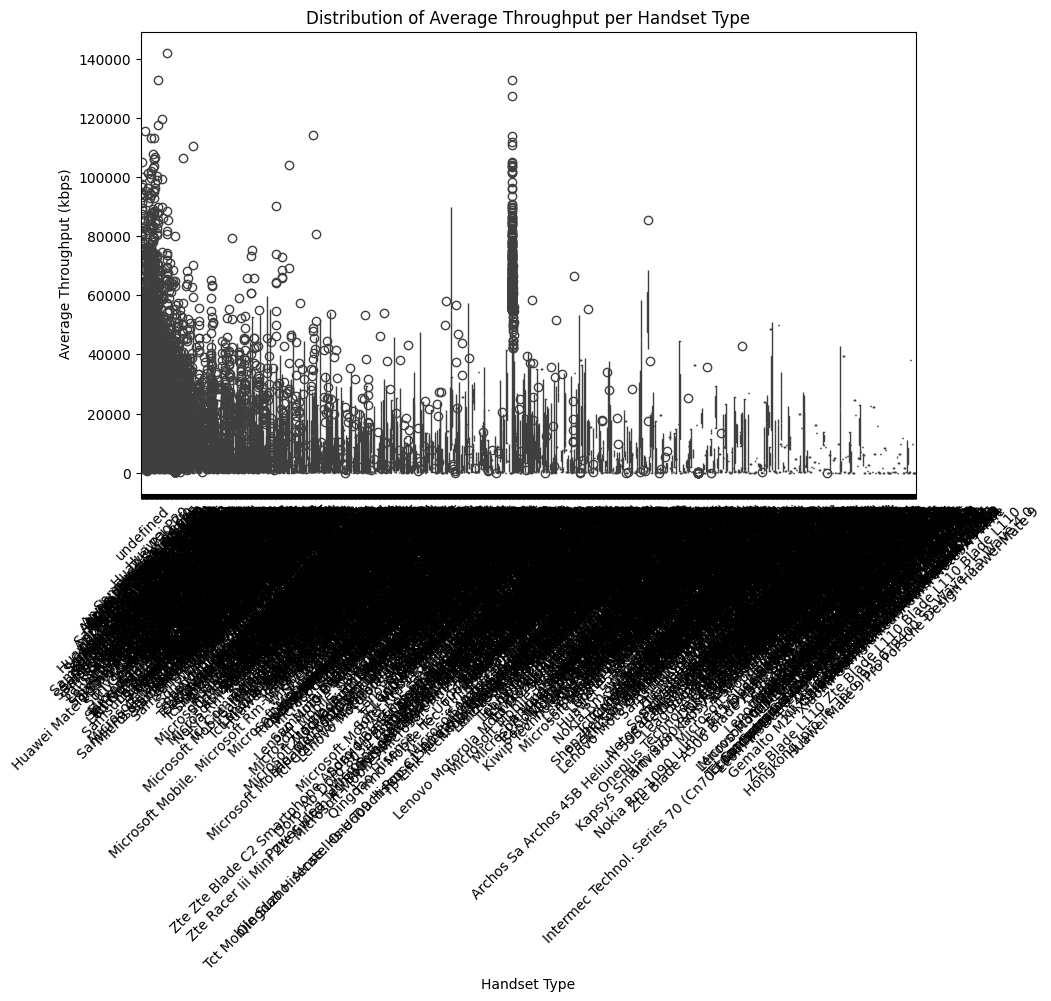

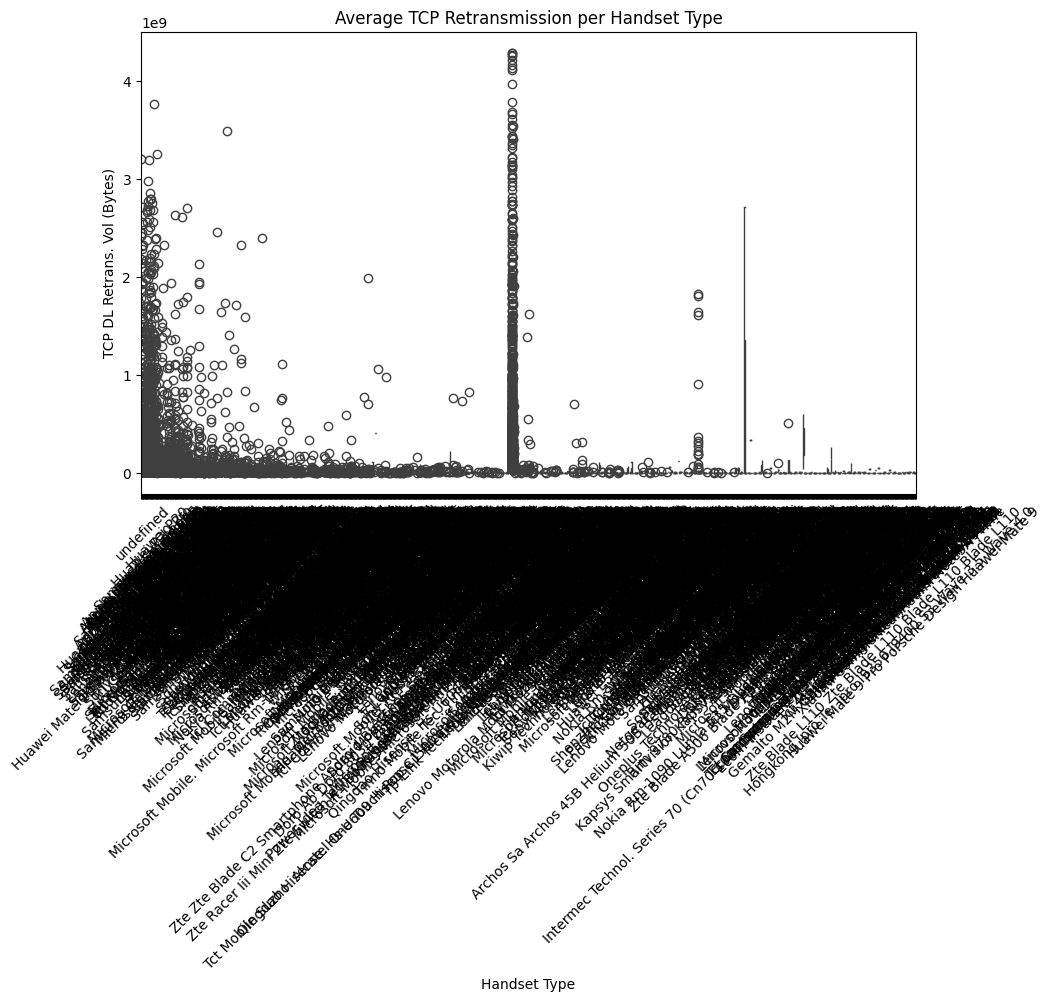

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of average throughput per handset type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Handset Type', y='Average Throughput (kbps)', data=customer_experience)
plt.title('Distribution of Average Throughput per Handset Type')
plt.xticks(rotation=45)
plt.show()

# Average TCP retransmission per handset type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Handset Type', y='TCP DL Retrans. Vol (Bytes)', data=customer_experience)
plt.title('Average TCP Retransmission per Handset Type')
plt.xticks(rotation=45)
plt.show()

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the metrics for clustering
experience_metrics = customer_experience[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 
                                         'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Average Throughput (kbps)']]

# Fill any remaining missing values with mean
experience_metrics.fillna(experience_metrics.mean(), inplace=True)

# Standardize the metrics
scaler = StandardScaler()
experience_metrics_scaled = scaler.fit_transform(experience_metrics)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_experience['Cluster'] = kmeans.fit_predict(experience_metrics_scaled)

# Compute statistics for each cluster
cluster_description = customer_experience.groupby('Cluster').agg({
    'TCP DL Retrans. Vol (Bytes)': ['mean', 'std'],
    'TCP UL Retrans. Vol (Bytes)': ['mean', 'std'],
    'Avg RTT DL (ms)': ['mean', 'std'],
    'Avg RTT UL (ms)': ['mean', 'std'],
    'Average Throughput (kbps)': ['mean', 'std']
}).reset_index()

print(cluster_description)

C:\Users\MMM\AppData\Local\Temp\ipykernel_18140\2664086726.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experience_metrics.fillna(experience_metrics.mean(), inplace=True)


  Cluster TCP DL Retrans. Vol (Bytes)                \
                                 mean           std   
0       0                9.578478e+06  4.550610e+07   
1       1                1.210047e+08  1.509659e+08   
2       2                1.695694e+09  7.665609e+08   

  TCP UL Retrans. Vol (Bytes)               Avg RTT DL (ms)              \
                         mean           std            mean         std   
0                6.660078e+05  5.127625e+06      105.240748  580.888449   
1                1.806782e+09  4.812914e+08      113.187500  132.588237   
2                1.153355e+06  6.429192e+06       82.170020  187.403207   

  Avg RTT UL (ms)            Average Throughput (kbps)                
             mean        std                      mean           std  
0       16.772183  73.658936               6534.675591  11459.070574  
1       36.625000  11.939954              44066.812500  32151.719920  
2       21.172054  29.201266              15215.633568  20050.13

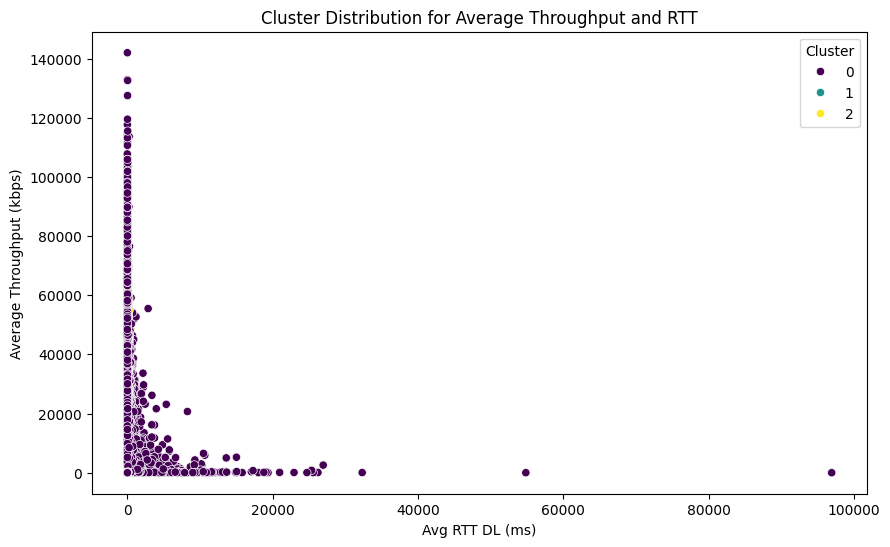

In [21]:
# Visualize clusters if necessary
# Example: Visualize cluster distribution for average throughput
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg RTT DL (ms)', y='Average Throughput (kbps)', hue='Cluster', data=customer_experience, palette='viridis')
plt.title('Cluster Distribution for Average Throughput and RTT')
plt.show()